Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
55000
(55000, 784)
(55000, 10)


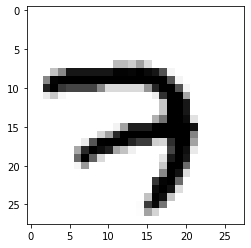

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
31.459873
6.7823987
5.294943
1.353095
0.0
0.0
1.1785486
0.4781871
0.0
0.636471
정확도 : 0.9574000239372253


In [2]:
##기본 MNIST 예제(multinomial classification)
import tensorflow as tf
import matplotlib.pyplot as plt  
import numpy as np  
from tensorflow.examples.tutorials.mnist import input_data  

#Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)  
##Data set 을 불러들이는 코드작성. (input data란 객체 제공해줌. read_data_set이란 함수 제공해줌)
#one_hot encoding처리까지 자동적으로 해줌

##데이터 확인
print(mnist.train.num_examples) #학습용 데이터의 개수
print(mnist.train.images.shape) #(55000,784)
#우리가 불러들인 mnist에서 학습용 데이터(image/label) 중 image data볼거에요. (가로 28,세로 28 픽셀정보가 담긴 Data)
# 28X28이미지를 1차원 형태로 저장

print(mnist.train.labels.shape)

plt.imshow(mnist.train.images[0].reshape(28,28),
           cmap="Greys", interpolation="nearest")  ##55000개중 첫번째 이미지에 대한 픽셀정보. (이미지 를 x,y축에 맞춰 그려야하니까 1차원을 2차원으로 reshape해주는거임)
plt.show()
print(mnist.train.labels[0])


#placeholder
X=tf.placeholder(shape=[None,784], dtype=tf.float32)  ##행부분은 나중에 예측할때 문제가 생기므로 55000이아닌None, 열부분만 표기
Y=tf.placeholder(shape=[None,10], dtype=tf.float32)

#Weight & bias
W1=tf.Variable(tf.random_normal([784,256]), name="weight1")  
#10 여기 숫자는 정해져있는게 없음 2번째 layeer에 내가 몇개의 input을 쓸거냐 
#에따라 달라짐.숫자가 클수록 더 많이 학습한다는 뜻임.
b1=tf.Variable(tf.random_normal([256]), name="bias1")
layer1=tf.nn.relu(tf.matmul(X,W1)+b1)

W2=tf.Variable(tf.random_normal([256,256]), name="weight2")  #2 2  2output과 input과의 갯수만 맞추자
b2=tf.Variable(tf.random_normal([256]), name="bias2") #너의 output은 y와 맞
layer2=tf.nn.relu(tf.matmul(layer1,W2)+b2)

W3=tf.Variable(tf.random_normal([256,10]), name="weight3")  #2 2  2output과 input과의 갯수만 맞추자
b3=tf.Variable(tf.random_normal([10]), name="bias3")
#layer3=tf.sigmoid(tf.matmul(X,W1)+b3)

# hypothesis
logits = tf.matmul(layer2,W3) + b3
H = tf.nn.relu(logits)


#cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))


#train node생성
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train=optimizer.minimize(cost)

#Session & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())


    
training_epoch = 30 #(30번 반복한다는 뜻)
batch_size = 100 # 55000개의 행을 다 읽어들이는게 아니라 100 개의 행을 읽어서 반복 학습.(100개씩 잘라서 55000개를 읽을거에요-2중루프 필요. 에폭포르푸, 배치포루프)

for step in range(training_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size )
    cost_val = 0
    for i in range(num_of_iter):
        batch_x, batch_y =mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train,cost],
                              feed_dict={X:batch_x,Y:batch_y})
    if step % 3 ==0:
        print(cost_val)

#Accuracy 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy =tf.reduce_mean(tf.cast(correct,dtype=tf.float32))

result=sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels})
print("정확도 : {}".format(result))

In [ ]:
##sigmoid는 값이 점점 희미해지는 경향을 띈다.
##이거 말고 더 좋은 형태
##랠루~가즈앗 = relu
# GradientDescent
# 이;거말고 더 좋은거

# AdamOptimizer

In [ ]:
#Kaggle

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

# 싸이키런
from sklearn.preprocessing import MinMaxScaler
from tensorflow.examples.tutorials.mnist import input_data

# Data Loading
mnist = pd.read_csv('./data/kaggle/train.csv')
mnist_test = pd.read_csv('./data/kaggle/test.csv')

df_x = mnist.drop('label', axis=1, inplace=False)
df_y = mnist['label']


ERROR! Session/line number was not unique in database. History logging moved to new session 61


In [4]:
sess = tf.Session()
x_data = MinMaxScaler().fit_transform(df_x.values)
y_data = MinMaxScaler().fit_transform(tf.one_hot(df_y, depth=10).eval(session=sess))

In [7]:
# placeholder 
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)

# Weight & bias

W1 = tf.Variable(tf.random_normal([784,256]), name='weight1')
b1 = tf.Variable(tf.random_normal([256]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)

# 두번째  Layer .layer1의 output 개수가 layer2의 input 개수와 같아야 한다.
W2 = tf.Variable(tf.random_normal([256,256]), name='weight2')
b2 = tf.Variable(tf.random_normal([256]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)

W3 = tf.Variable(tf.random_normal([256,10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')


# hypothesis
logits = tf.matmul(layer2,W3) + b3
H = tf.nn.relu(logits)

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# train node 생성
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)


# Session & 초기화
sess.run(tf.global_variables_initializer())

# 학습

num_of_epoch =30
batch_size=100

for step in range(num_of_epoch):
    total_iter=int(mnist.train.num_examles/batch_size)
    for i in range(total_iter):
    ([train, cost], feed_dict = {X:x_data, Y:y_data})
    if step % 300 == 0:
        print("cost:{}".format(cost_val))


cost:1656.6617431640625
cost:0.31314945220947266
cost:1.221781440108316e-05
cost:4.575949333229801e-06
cost:2.7049982236349024e-06
cost:1.8528792224969948e-06
cost:1.3658564057550393e-06
cost:1.052695779435453e-06
cost:8.360435117538145e-07
cost:6.778888632652524e-07


In [ ]:

# ===================
# train.csv
# => 7:3 비율로 나누어서 학습 및 accuracy 확인
# -batch 형태로 데이터를 읽어들여서 학습
# test.csv를 이용하여 prediction 결과도출

# 해당 결과를 이용하여
# submission.csv파일을 생헝한 후 Kanggle site에 제출 및 확인.
# ======================

In [1]:
#07_16
#왜 Relu가 더 좋나?
#sigmoid 를 사용하면 layer가 갈수록(?) 흐려지는 경향성을 띈다.
#
#초기 Weight값 초기화 문제
#초기값을 0으로 주면 안됨. ->그러면 어떻게하면 초기값을 잘 조성할 수 있을까!
#Weight의 초기화를 위해 RBM이라고 불리는 복잡한 방법을 이용.
#또는 수식보다 라이브러리가 제공해주는 걸 사용하는게 효율이 훨씬 좋음.
#W1=tf.Variable(tf.random_normal([784,256]), name="weight")
#
#Neural Network Overfitting을 방지하기 위한 간단한 방법
#Dropout : random하게 몇 개의 neuron을 zero로 setting
#
#layer1=tf.nn.dropout(_layer1, keep_prob=keep_prob)  :::::::::keep_prob : 몇 %의 자료를 사용할것인가.
#
#
#
#


In [3]:
# 기본 MNIST(multinomial classification)
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading
train_data = pd.read_csv("./data/kaggle/train.csv")
train_x_data = train_data.drop('label', axis = 1)
train_y_data = tf.one_hot(train_data["label"], depth=10).eval(session = tf.Session())
test_x_data = pd.read_csv("./data/kaggle/test.csv")

# Tensorflow Graph Initialization
tf.reset_default_graph()

X = tf.placeholder(shape = [None, 784], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 10], dtype = tf.float32)
keep_prob = tf.placeholder(dtype=tf.float32)

# Weight & bias
W1 = tf.get_variable("weight1", shape = [784,256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")
_layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)
layer1 = tf.nn.dropout(_layer1, keep_prob = keep_prob)

W2 = tf.get_variable("weight2", shape = [256,256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")
_layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)
layer2 = tf.nn.dropout(_layer2, keep_prob = keep_prob)

W3 = tf.get_variable("weight3", shape = [256,10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name = "bias3")

# Hypothesis
logits = tf.matmul(layer2,W3) + b3
H = tf.nn.relu(logits)

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))

# train node
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

# session object & initialization
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# epoch & batch size
training_epoch = 10
batch_size = 100

# training
for step in range(training_epoch):
    num_of_iteration = int(train_data.shape[0] / batch_size)
    cost_val = 0
    
    for i in range(num_of_iteration):
        batch_x, batch_y = train_x_data[i*batch_size:(i+1)*batch_size],train_y_data[i*batch_size:(i+1)*batch_size]
        _, cost_val = sess.run([train, cost], feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})

    if step %5 == 0:
        print(cost_val)
        
#predict check
predict = tf.argmax(H,1)
result = sess.run(predict, feed_dict={X:test_x_data, keep_prob: 1.0})
df = pd.DataFrame({
    'ImageId': [i for i in range(1,28001)],
    'Label': result
})
df.to_csv('./data/kaggle/submission.csv', index=False)

correct = tf.equal(predict, tf.math.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("Accuracy: {}".format(sess.run(accuracy, feed_dict = {X: train_x_data, Y: train_y_data, keep_prob: 1.0})))

0.7969481
0.036978927
Accuracy: 0.980571448802948


In [4]:
#predict check
predict = tf.argmax(H,1)
result = sess.run(predict, feed_dict={X:test_x_data, keep_prob: 1.0})
df = pd.DataFrame({
    'ImageId': [i for i in range(1,28001)],
    'Label': result
})
df.to_csv('./data/kaggle/submission.csv', index=False)

correct = tf.equal(predict, tf.math.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("Accuracy: {}".format(sess.run(accuracy, feed_dict = {X: train_x_data, Y: train_y_data, keep_prob: 1.0})))

Accuracy: 0.980571448802948


In [5]:
a="Show me the Code"
result=a.replace("Code","Money")
print(result)

Show me the Money


In [6]:
a="Show me the Code"
result=a.split()
print(result)


['Show', 'me', 'the', 'Code']


In [7]:
a="a::b::c::d::e"
result=a.split(":")
print(result)

['a', '', 'b', '', 'c', '', 'd', '', 'e']


In [9]:
a=[1,2,3]
print(a*3)
print(str(a[0])+"Hello")

[1, 2, 3, 1, 2, 3, 1, 2, 3]
1Hello


In [17]:

range_2=range(1,11,2)
print(range_2.index(7))
print(range_2)
print(range_2[:2])

3
range(1, 11, 2)
range(1, 5, 2)


In [18]:

a={"name":"홍길동","age":30}
print(type(a))                        
a[10]="kk"                              
a["hobby"]="game"                      
print(a)


<class 'dict'>
{'name': '홍길동', 'age': 30, 10: 'kk', 'hobby': 'game'}


In [21]:
dict_1={"name":"홍길동","age":30,"age":40}
dict_2={"name":"홍길동","age":30,("address:,"):"서울"}
print(dict_2["age"])
print(dict_2[("address:,")])


30
서울
